In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import math
import csv
%matplotlib inline

In [4]:
with open('0.csv') as csvfile:
    
    # читаем файл
    readCSV = csv.reader(csvfile, delimiter=',')
    
    # записываем в список
    data = []
    for row in readCSV:
        data.append(row)
print(data[0])
data = np.matrix(data)

['-5.466446996780023326e+00', '1.000000000000000000e+00', '7.942325572326950578e+00', '1.793863535584802049e+00', '9.938451780001654468e-03']


In [5]:
# удаляем посдледний столбец
X = np.delete(data, 0, 1)
X = np.matrix(X, dtype=float)

Y = data[:,0]
Y = np.matrix(Y, dtype=float)
print(len(Y))

1000


In [6]:
# посчитаем оценку theta
theta_square = np.linalg.inv(X.T * X)* X.T * Y
print(theta_square)

det = np.linalg.det(X.T * X)
print("det: ", det)

matr_size = len((X.T * X)[:,0])
vec_size = len(Y)

[[ -3.13824909e+02]
 [ -1.68185719e+00]
 [  3.68421193e+00]
 [  3.16912012e+04]]
det:  0.68069865302


### Вывод: 

In [7]:
%%time
id_ = np.identity(matr_size, dtype=float)
range_ = np.arange(0, 100, 0.1)

theta_hat = []

theta_hat = np.array([np.linalg.inv(np.delete(X, i, axis=0).T * np.delete(X, i, axis=0) + 
                                    lambda_*id_)*np.delete(X, i, axis=0).T*np.delete(Y, i, axis=0) 
                      for lambda_ in range_
                     for i in range(vec_size)])
print(theta_hat)

[[[ -3.23295857e+02]
  [ -1.67243706e+00]
  [  3.67479257e+00]
  [  3.26382856e+04]]

 [[ -3.34747232e+02]
  [ -1.66091854e+00]
  [  3.66324176e+00]
  [  3.37834377e+04]]

 [[ -3.14647847e+02]
  [ -1.68104687e+00]
  [  3.68338588e+00]
  [  3.17735114e+04]]

 ..., 
 [[  1.91502133e+00]
  [ -1.86318240e+00]
  [  4.06522631e+00]
  [  1.92095024e-02]]

 [[  1.91595708e+00]
  [ -1.86326927e+00]
  [  4.06522386e+00]
  [  1.92188607e-02]]

 [[  1.91598152e+00]
  [ -1.86329402e+00]
  [  4.06523514e+00]
  [  1.92191054e-02]]]
Wall time: 1min 56s


In [8]:
%%time
# посчитаем оценку дисперсии
print(len(theta_hat))
# print(theta_hat[:,3])
sigma = []

# каждому lambda соответствует 1000 оценок
sigma = np.array([theta_hat[:, colmn][(lambda_ - 1000):lambda_].var() 
                  for lambda_ in range(1000, 1000001, 1000)
                 for colmn in range(4)])
print(sigma)

1000000
[  1.03860159e+02   1.03860879e-04   1.03852285e-04 ...,   1.37968371e-08
   1.66291079e-08   7.87297875e-11]
Wall time: 129 ms


In [123]:
sigma = sigma.reshape(1000, 4)
# print(sigma[:,0].reshape(1000, 1))

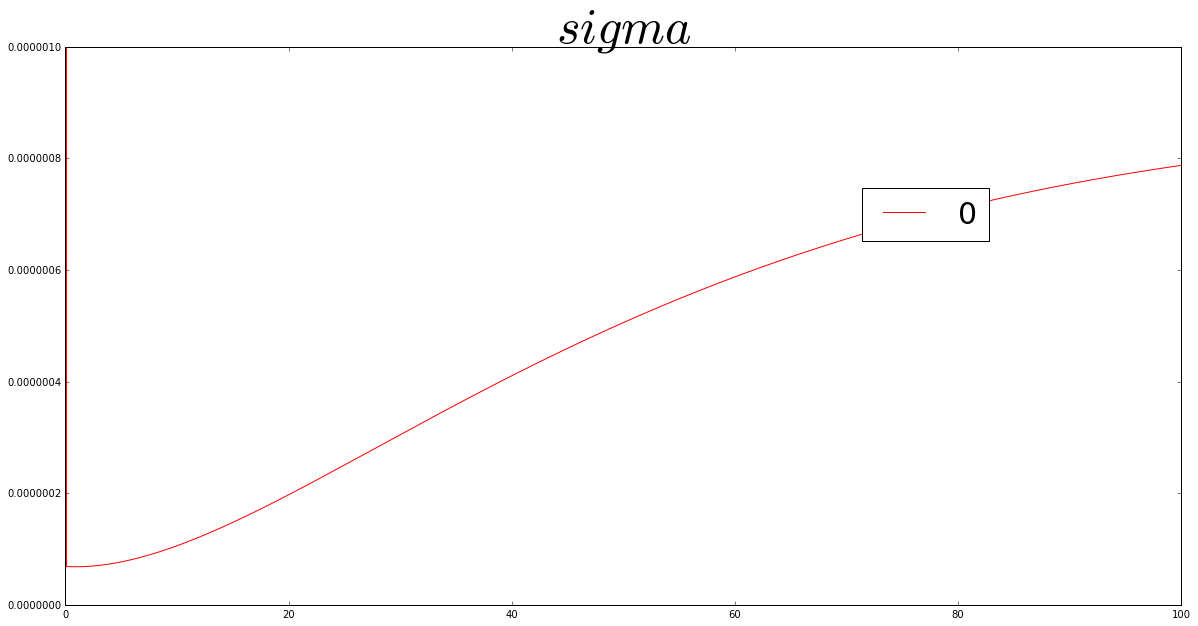

In [118]:
# построим графики
colors = ['red', 'blue', 'green', 'yellow']

plt.figure(figsize=(20,10))    
plt.title(r'$sigma$', fontsize = 50)
plt.plot(range_, sigma[:,0] , color=colors[0], label=str(0))
plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.7), fontsize = 30)
plt.ylim(0, 0.000001)
plt.show()

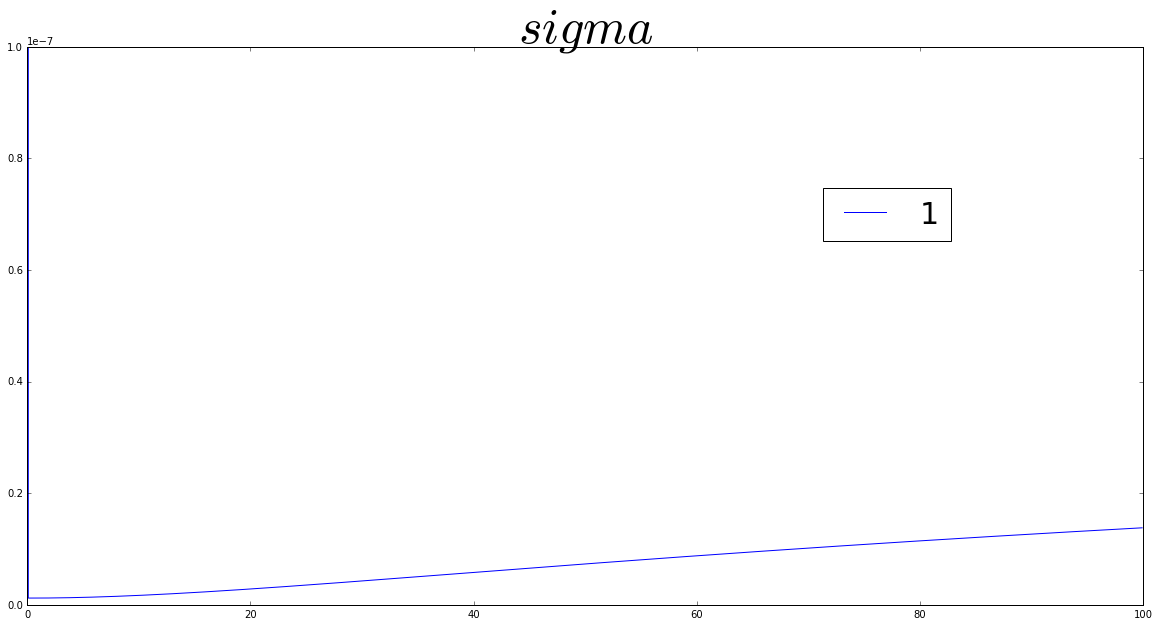

In [119]:
plt.figure(figsize=(20,10))    
plt.title(r'$sigma$', fontsize = 50)
plt.plot(range_, sigma[:,1] , color=colors[1], label=str(1))
plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.7), fontsize = 30)
plt.ylim(0, 0.0000001)
plt.show()

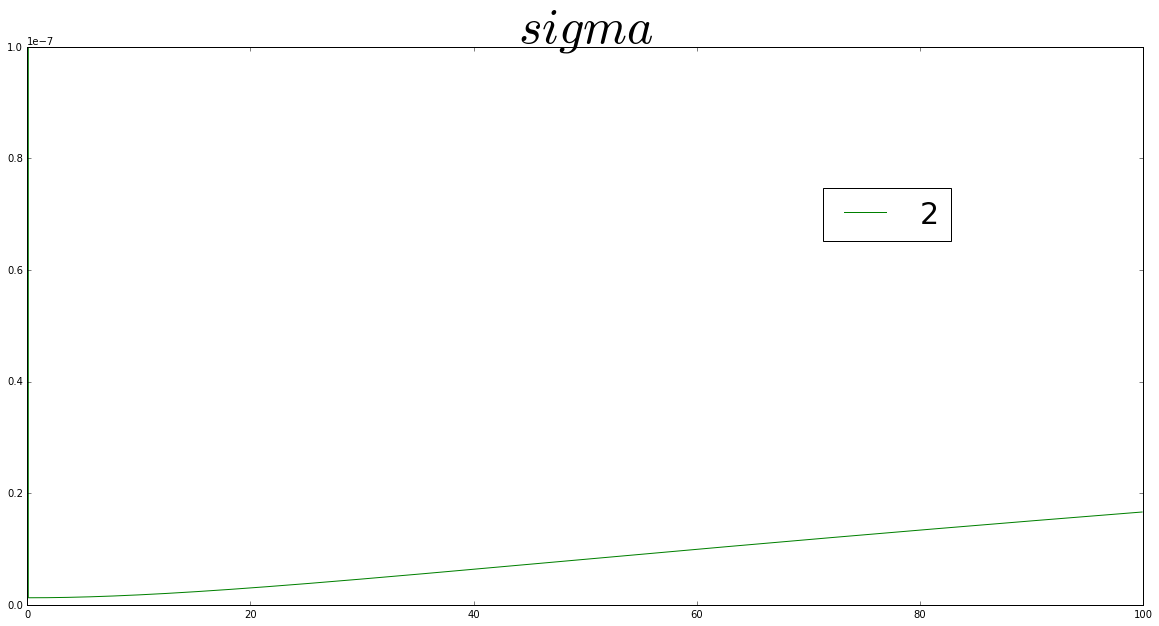

In [120]:
plt.figure(figsize=(20,10))    
plt.title(r'$sigma$', fontsize = 50)
plt.plot(range_, sigma[:,2] , color=colors[2], label=str(2))
plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.7), fontsize = 30)
plt.ylim(0, 0.0000001)
plt.show()

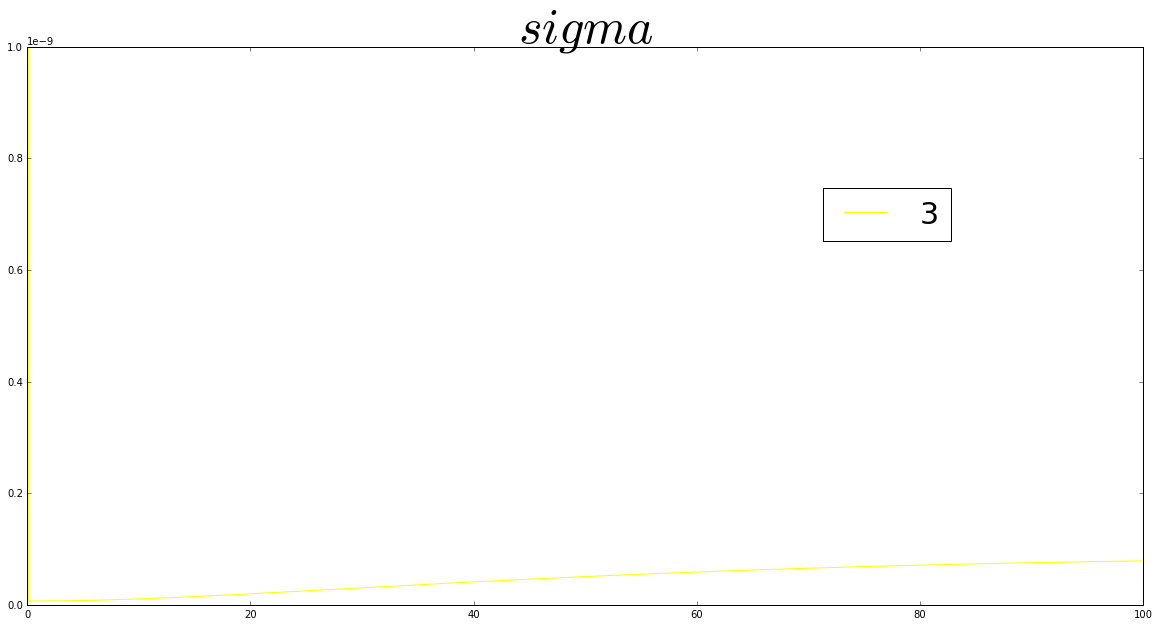

In [122]:
plt.figure(figsize=(20,10))    
plt.title(r'$sigma$', fontsize = 50)
plt.plot(range_, sigma[:,3] , color=colors[3], label=str(3))
plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.7), fontsize = 30)
plt.ylim(0, 0.000000001)
plt.show()

## оптимальное лямбда по первому графику равно нулю

# Доверительные интервалы

In [136]:
min_ = np.array([theta_hat[:, colmn][(lambda_ - 1000):lambda_].min() 
                  for lambda_ in range(1000, 1000001, 1000)
                 for colmn in range(4)])
max_ = np.array([theta_hat[:, colmn][(lambda_ - 1000):lambda_].max() 
                  for lambda_ in range(1000, 1000001, 1000)
                 for colmn in range(4)])

min_ = min_.reshape(1000, 4)
max_ = max_.reshape(1000, 4)
print(min_)

[[ -3.76195900e+02  -1.74274265e+00   3.62193857e+00   2.56144342e+04]
 [  3.08355830e+00  -1.99869119e+00   4.00116764e+00   3.08985864e-02]
 [  3.08157786e+00  -1.99848408e+00   4.00130146e+00   3.08772781e-02]
 ..., 
 [  1.91234323e+00  -1.86360963e+00   4.06476418e+00   1.91827234e-02]
 [  1.91164787e+00  -1.86351634e+00   4.06478663e+00   1.91757691e-02]
 [  1.91095309e+00  -1.86342310e+00   4.06480904e+00   1.91688205e-02]]


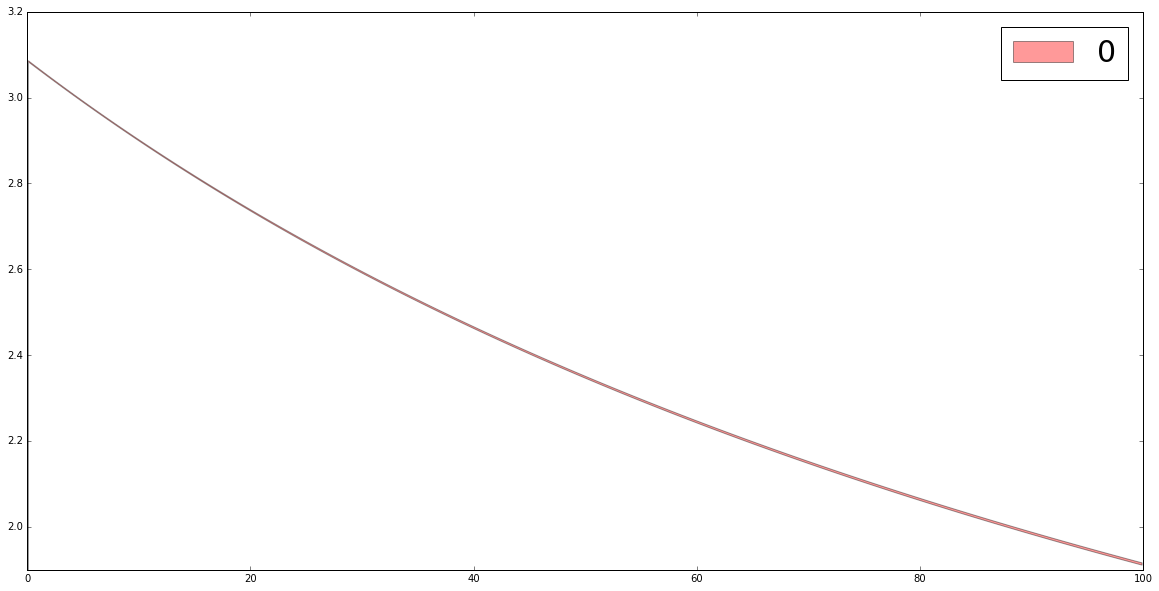

In [171]:
plt.figure(figsize=(20,10))    
plt.matplotlib.pyplot.fill_between(range_, min_[:,0],  max_[:,0], facecolor='red', alpha = 0.4, label=str(0))
plt.legend(fontsize=30)
plt.ylim(1.9, 3.2)
plt.show()

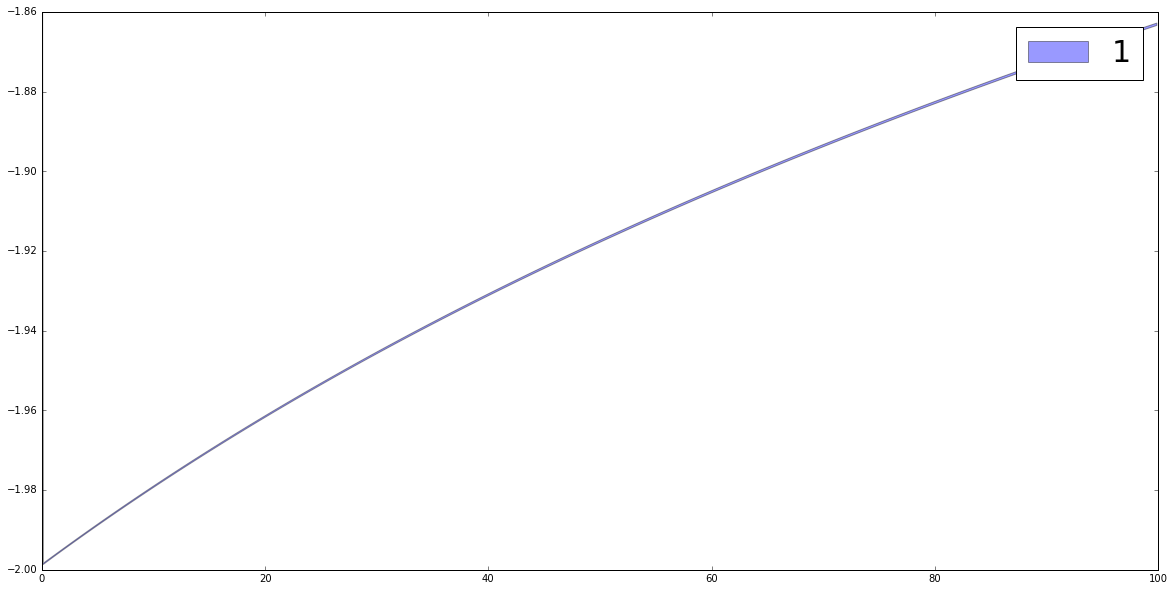

In [172]:
plt.figure(figsize=(20,10))    
plt.matplotlib.pyplot.fill_between(range_, min_[:,1],  max_[:,1], facecolor='blue', alpha = 0.4, label=str(1))
plt.legend(fontsize=30)
plt.ylim(-2, -1.86)
plt.show()

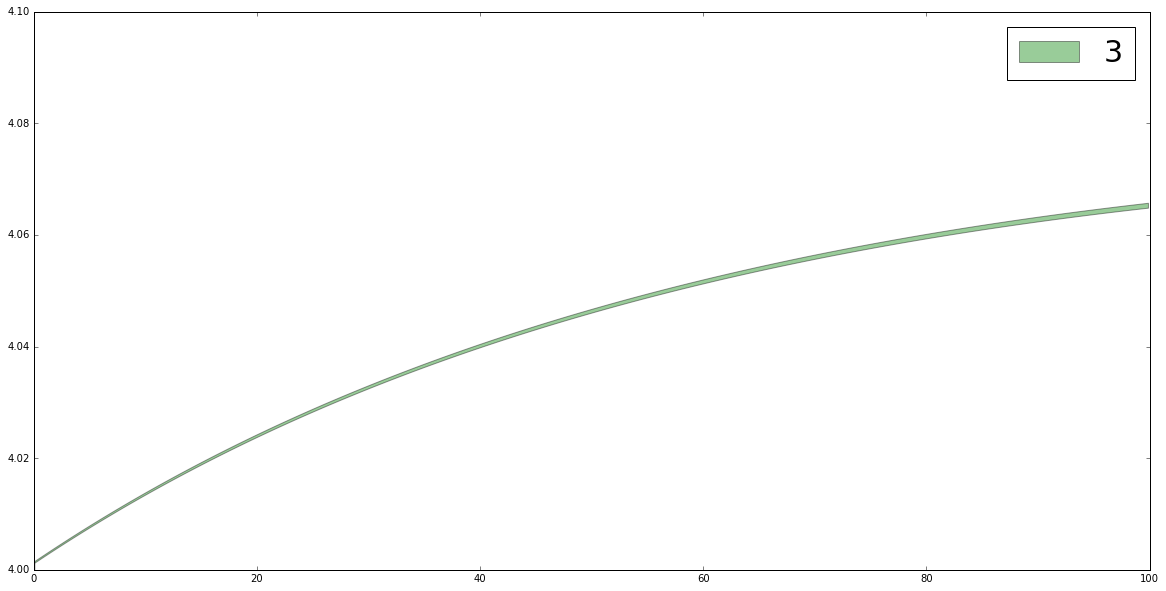

In [176]:
plt.figure(figsize=(20,10))    
plt.matplotlib.pyplot.fill_between(range_, min_[:,2],  max_[:,2], facecolor='green', alpha = 0.4, label=str(3))
plt.legend(fontsize=30)
plt.ylim(4, 4.1)
plt.show()

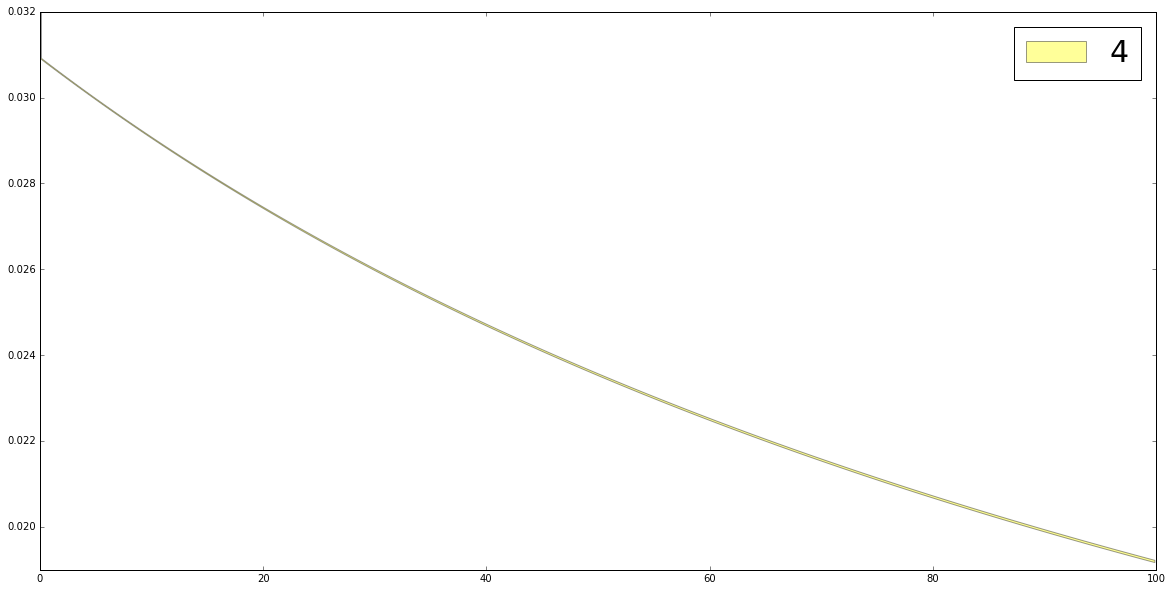

In [177]:
plt.figure(figsize=(20,10))    
plt.matplotlib.pyplot.fill_between(range_, min_[:,3],  max_[:,3], facecolor='yellow', alpha = 0.4, label=str(4))
plt.legend(fontsize=30)
plt.ylim(0.019, 0.032)
plt.show()